In [1]:
import torch
import PIL
from torchvision import models

In [2]:
fcn=models.segmentation.fcn_resnet101(pretrained=True)

In [3]:
import torchvision

In [4]:
import torchvision.transforms as transforms

In [5]:
min_img_size = 500
transform_pipeline = transforms.Compose([transforms.Resize((min_img_size,min_img_size)),
                                         transforms.ToTensor(),
                                         transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                              std=[0.229, 0.224, 0.225])])

In [6]:
import PIL

In [7]:
class_2_id=['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

In [8]:
img=PIL.Image.open("data/airplane.jpg")

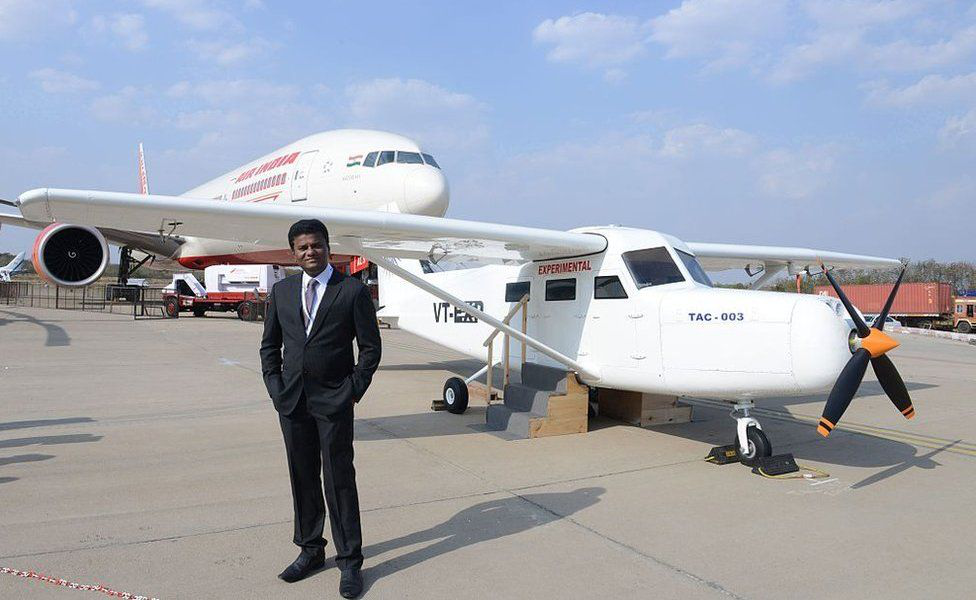

In [9]:
img

In [10]:
img = transform_pipeline(img)

In [11]:
img

tensor([[[1.3070, 1.3070, 1.3070,  ..., 0.4679, 0.4508, 0.4337],
         [1.3242, 1.3242, 1.3070,  ..., 0.4508, 0.4679, 0.4851],
         [1.3242, 1.3070, 1.2899,  ..., 0.4508, 0.4851, 0.5536],
         ...,
         [0.6392, 0.6906, 0.6221,  ..., 0.8789, 0.8789, 0.8961],
         [0.6221, 0.7077, 0.6392,  ..., 0.8961, 0.8961, 0.9132],
         [0.6221, 0.6221, 0.6392,  ..., 0.8789, 0.8789, 0.8961]],

        [[1.5882, 1.6057, 1.6408,  ..., 1.0805, 1.0980, 1.0805],
         [1.6057, 1.6232, 1.6408,  ..., 1.0805, 1.1155, 1.1331],
         [1.6232, 1.6408, 1.6232,  ..., 1.0805, 1.1155, 1.1856],
         ...,
         [0.6604, 0.7129, 0.6429,  ..., 0.9055, 0.9055, 0.9230],
         [0.6429, 0.7304, 0.6604,  ..., 0.9230, 0.9230, 0.9405],
         [0.6429, 0.6429, 0.6604,  ..., 0.9055, 0.9055, 0.9230]],

        [[2.2566, 2.2740, 2.2914,  ..., 2.0474, 2.0474, 2.0300],
         [2.2740, 2.2740, 2.2914,  ..., 2.0125, 2.0300, 2.0474],
         [2.2914, 2.2914, 2.2740,  ..., 1.9951, 2.0125, 2.

In [12]:
img = img.unsqueeze(0)

In [13]:
img.shape

torch.Size([1, 3, 500, 500])

In [14]:
fcn.eval()
prediction = fcn(img) 

In [15]:
prediction['out'].shape

torch.Size([1, 21, 500, 500])

In [16]:
fcn

FCN(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequenti

In [15]:
mask=prediction['out'].argmax(1)

In [16]:
mask=mask.numpy()

In [17]:
import numpy as np

In [18]:
np.unique(mask)

array([ 0,  1, 15])

In [19]:
class_2_id[15]

'person'

In [20]:
class_2_id[1]

'aeroplane'

In [21]:
class_2_id[0]

'__background__'

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

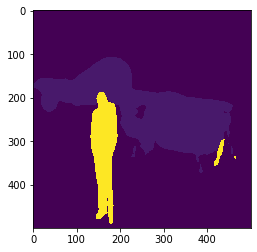

In [23]:
plt.imshow(mask.reshape((500,500)))

In [24]:
color_map=np.array([[0,0,0],
                   [255,0,0],
                   [0,255,0],
                   [0,0,255],
                   [255,255,0],
                   [0,255,255],
                   [255,0,255],
                   [0,0,128],
                   [139,0,139],
                   [139,69,19],
                   [30,144,255],
                   [255,215,0],
                   [128,128,0],
                   [0,255,255],
                   [70,130,180],
                   [199,21,133],
                   [210,105,30],
                   [188,143,143],
                   [112,128,144],
                   [28,128,0],
                   [0,128,128]])

In [25]:
mask.shape

(1, 500, 500)

In [26]:
color_map.shape

(21, 3)

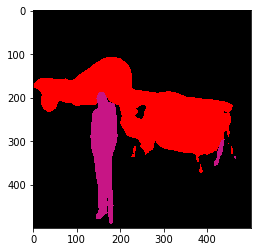

In [27]:
plt.imshow(color_map[mask.reshape((500,500))])

Source: https://discuss.pytorch.org/t/how-to-visualize-segmentation-output-multiclass-feature-map-to-rgb-image/26986

Pallete: https://www.rapidtables.com/web/color/RGB_Color.html